### N Balaji                                           nbalaji743@gmail.com

# 01-Prediction of delivery time using sorting time

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling as pp
import sweetviz as sv

In [2]:
dt = pd.read_csv("delivery_time.csv")

In [3]:
dt

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Visulaization


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
#Count of duplicated rows
dt[dt.duplicated()].shape

(0, 2)

C:\Users\91944\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

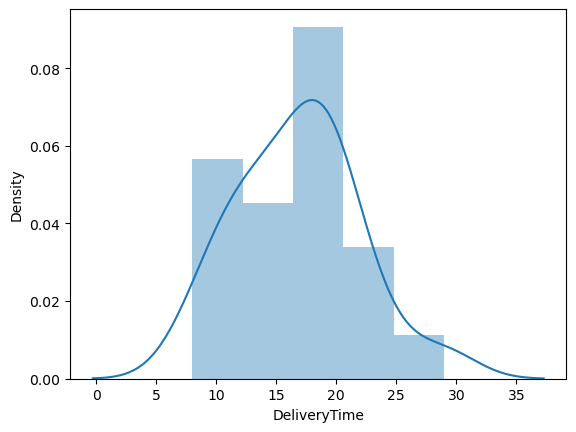

In [6]:
sns.distplot(dt['DeliveryTime'])

C:\Users\91944\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

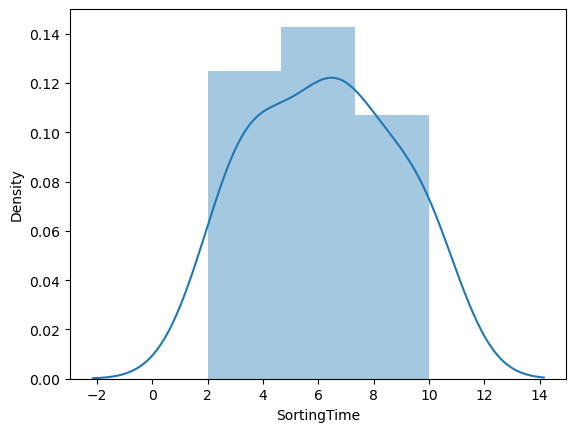

In [7]:
sns.distplot(dt['SortingTime'])

<AxesSubplot:>

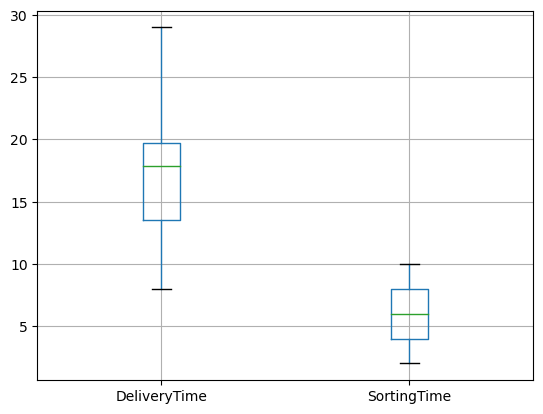

In [8]:
dt.boxplot()

In [9]:
#Descriptive stat
dt.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:>

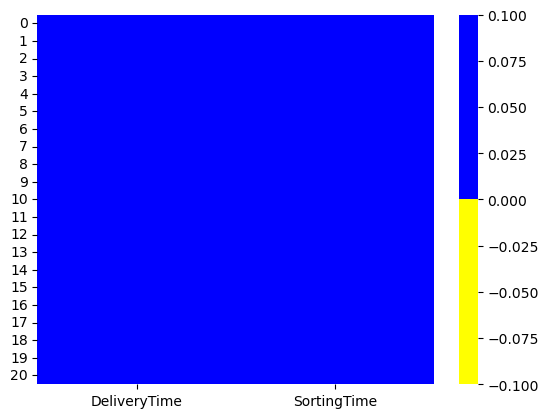

In [10]:
#heatmap is used to detect the missing value, yellow representrs the missing values
import seaborn as sns
cols = dt.columns 
colours = ['yellow', 'blue'] 
sns.heatmap(dt[cols].isnull(),
            cmap=sns.color_palette(colours))

In [11]:
#the entrie analysis report is shown in the html file
sweet_report = sv.analyze(dt)
sweet_report.show_html('Sorting_delivery.html')

                                             |                                             | [  0%]   00:00 ->…

Report Sorting_delivery.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# correlation analysis

In [5]:
# correlation matrix
corel = dt.corr()
corel

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

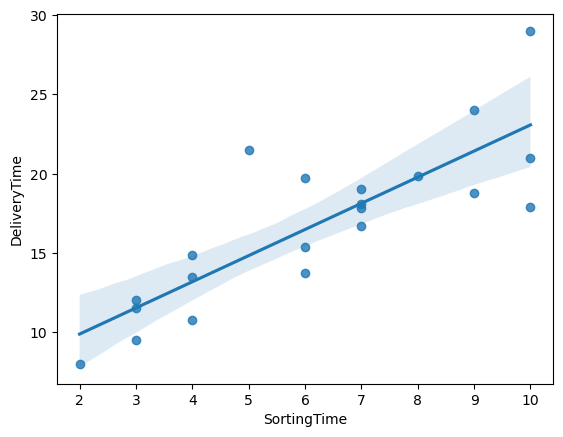

In [20]:
sns.regplot(x=dt['SortingTime'],y=dt['DeliveryTime'])

# model building

In [41]:
import statsmodels.formula.api as smf

In [42]:
model_1 = smf.ols("DeliveryTime~SortingTime",data = dt).fit()

In [43]:
model_1.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [44]:
# Finding tvalues and pvalues
model_1.tvalues , model_1.pvalues

(Intercept      3.823349
 SortingTime    6.387447
 dtype: float64,
 Intercept      0.001147
 SortingTime    0.000004
 dtype: float64)

In [45]:
# Finding Rsquared Values
model_1.rsquared , model_1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [9]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        09:33:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
model_2 = smf.ols("np.log(DeliveryTime)~SortingTime",data = dt).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Thu, 15 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                          07:54:16   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Finding Rsquared Values
model_2.rsquared , model_2.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

In [51]:
model_3 = smf.ols("np.log(DeliveryTime)~np.log(SortingTime)",data = dt).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.772
Model:                              OLS   Adj. R-squared:                  0.760
Method:                   Least Squares   F-statistic:                     64.39
Date:                  Thu, 15 Dec 2022   Prob (F-statistic):           1.60e-07
Time:                          07:55:12   Log-Likelihood:                 10.291
No. Observations:                    21   AIC:                            -16.58
Df Residuals:                        19   BIC:                            -14.49
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.7420      0.133     13.086      0.000       1.463       2.021
np.log(SortingTime)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Finding Rsquared Values
model_3.rsquared , model_3.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [53]:
dt["SortingTime_sq"]= dt.SortingTime**2
model_4=smf.ols("np.log(DeliveryTime)~np.log(SortingTime_sq+SortingTime)",data=dt).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.769
Model:                              OLS   Adj. R-squared:                  0.757
Method:                   Least Squares   F-statistic:                     63.34
Date:                  Thu, 15 Dec 2022   Prob (F-statistic):           1.81e-07
Time:                          07:55:19   Log-Likelihood:                 10.157
No. Observations:                    21   AIC:                            -16.31
Df Residuals:                        19   BIC:                            -14.23
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.5875      0.153     10.372      0.000       1.267       1.908
np.log(SortingTime_sq + SortingTime)     0.3267      0.041      7.959      0.000       0.241       0.413
==============================================================================
Omnibus:                        1.923   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.194
Skew:                           0.583   Prob(JB):                        0.551
Kurtosis:                       2.930   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Finding Rsquared Values
model_4.rsquared , model_4.rsquared_adj

(0.7692451915083321, 0.7571002015877181)

In [14]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        09:33:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# model predictions

In [20]:
# model_1 has the R-squared:	0.682 which is considered to be a good model and the predition are made from 
# model_1
#a=input('Enter the sorting time')
a=int(input('Enter the sorting time:'))
newtime=pd.Series([a])
dt_pred=pd.DataFrame(newtime,columns=["SortingTime"])
b=model_1.predict(dt_pred)
print("the delivery time :",b)


Enter the sorting time:10
the delivery time : 0    23.072933
dtype: float64


#  02- Building a prediction model for Salary_hike

In [56]:
sa=pd.read_csv('Salary_data.csv')

In [57]:
sa.shape

(30, 2)

In [58]:
sa.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA and Visualization


In [59]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [60]:
#Count of duplicated rows
sa[sa.duplicated()].shape

(0, 2)

C:\Users\91944\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

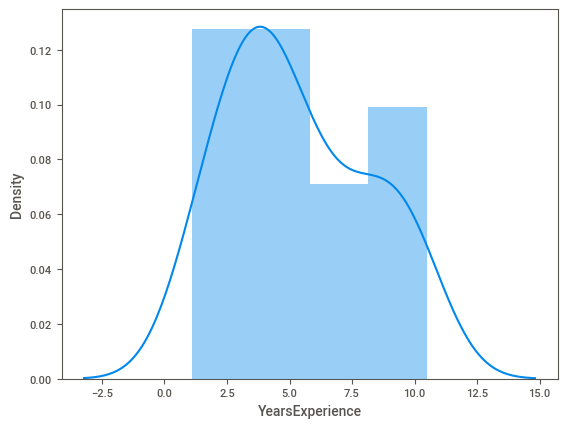

In [62]:
sns.distplot(sa['YearsExperience'])

C:\Users\91944\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

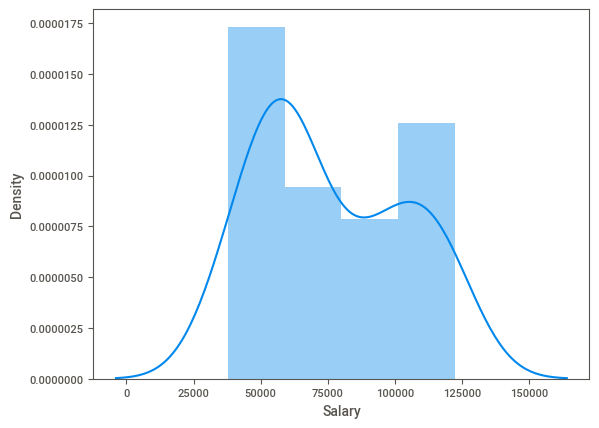

In [64]:
sns.distplot(sa['Salary'])

<AxesSubplot:>

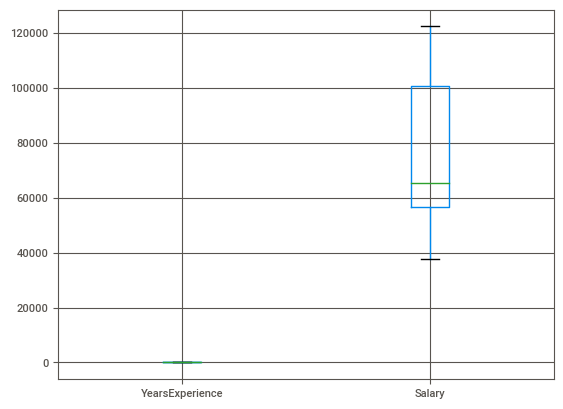

In [65]:
sa.boxplot()

In [66]:
#Descriptive stat
sa.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:>

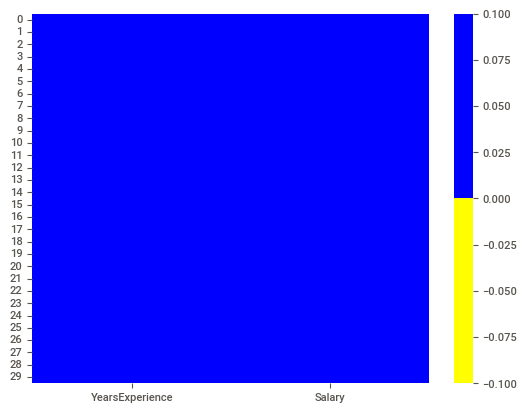

In [68]:
#heatmap is used to detect the missing value, yellow representrs the missing values
import seaborn as sns
cols = sa.columns 
colours = ['yellow', 'blue'] 
sns.heatmap(sa[cols].isnull(),
            cmap=sns.color_palette(colours))

In [69]:
#the entrie analysis report of the data is shown in the html file
sweet_report = sv.analyze(sa)
sweet_report.show_html('Salary.html')

                                             |                                             | [  0%]   00:00 ->…

Report Salary.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# correlation analysis

In [39]:
corre=sa.corr()
corre

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

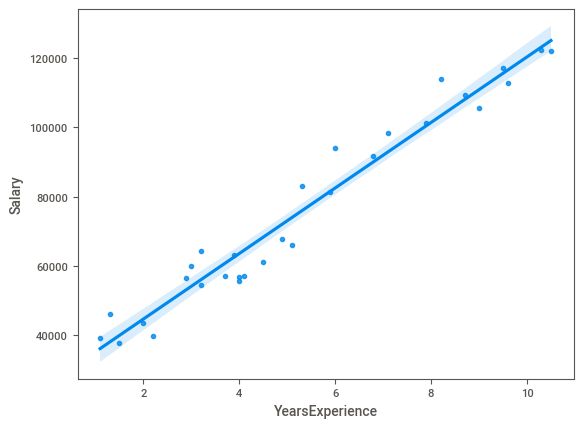

In [73]:
sns.regplot(x=sa['YearsExperience'],y=sa['Salary'])

In [74]:
m_1 = smf.ols("Salary~YearsExperience",data = sa).fit()
m_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        08:05:51   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
m_1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [76]:
# Finding tvalues and pvalues
m_1.tvalues , m_1.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [77]:
# Finding Rsquared Values
m_1.rsquared , m_1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [78]:
m_2 = smf.ols("Salary~np.log(YearsExperience)",data = sa).fit()
m_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.25e-13
Time:                        08:07:12   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
m_2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [80]:
# Finding tvalues and pvalues
m_2.tvalues , m_2.pvalues

(Intercept                   2.895135
 np.log(YearsExperience)    12.791989
 dtype: float64,
 Intercept                  7.268813e-03
 np.log(YearsExperience)    3.250155e-13
 dtype: float64)

In [81]:
# Finding Rsquared Values
m_2.rsquared , m_2.rsquared_adj

(0.853888882875697, 0.8486706286926862)

In [82]:
# m_1 has the R-squared:	0.957 which is considered to be a good model and the predition are made from 
# m_1
m_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        08:07:13   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
m_1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [84]:
#from the best model created the salary is calculated from the years of experience
c=float(input('Enter the Years of Experience:'))
sal=pd.Series([c])
sa_pred=pd.DataFrame(sal,columns=["YearsExperience"])
d=m_1.predict(sa_pred)
print("salary :",d)

Enter the Years of Experience:10
salary : 0    120291.823413
dtype: float64
